In [1]:
import math
import random
# 目标函数
def func(x):
    return  x ** 2+ math.sin(5 * x)

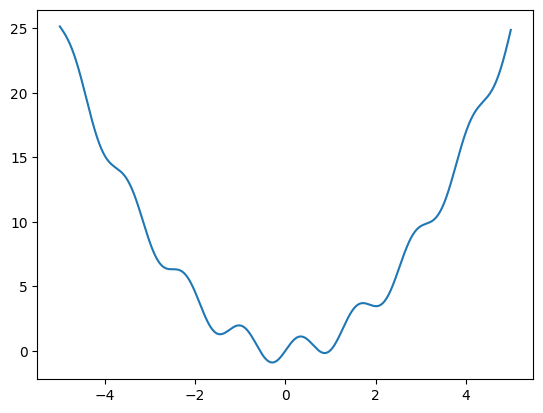

In [2]:
# 画图
import matplotlib.pyplot as plt
import numpy as np
# 从-5到5之间取1万个点
xarray = np.linspace(-5,5,10000)
# plt.plot画图函数
# xarray， [xxxx for... in... ]
# y = []
# for x in xarray:
#     y.append(func(x))
plt.plot(xarray,[func(x) for x in xarray])

In [1]:
# 遗传算法

import math

# 原函数
def func(x):
    return x**2 + math.sin(5*x)

# 适应度函数
def fitness(x):
    # 30 - func(x)
    return 30-(x**2 + math.sin(5*x))

# 导入随机数工具包
import random

# 设置参数
POPULATION_SIZE = 50
GENE_LENGTH = 16

# 生成初代样本
# 最好基于一些经验生成，而不是随机生成
def generate_population(population_size, gene_length):
    # 输入：
    # population_size： 一代的个体数
    # gene_length： 编码长度
    population = []
    # 对于每个样本个体（基因型）
    for i in range(population_size):
        # 随机取0和1生成一段由01构成的数组，作为一个个体
        individual = [random.randint(0, 1) for j in range(gene_length)]
        # 将随机生成的个体保存在population数组中
        population.append(individual)
    return population

population = generate_population(POPULATION_SIZE, GENE_LENGTH)

# 交叉
def crossover(parent1, parent2):
    # 输入：
    # 两个亲代个体

    # 随即指定交叉点
    crossover_point = random.randint(0, GENE_LENGTH - 1)
    # 将child1 由parent1的前面部分和parent2的后面部分拼接
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    # 将child2 parent2的前面部分拼接和由parent1的后面部分
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    # 返回两个child
    return child1, child2

# 变异
def mutation(individual, mutation_probability):
    # 对于每个个体
    for i in range(GENE_LENGTH):
        # 随机出一个数字，如果数字小于变异概率则执行变异，否则不变异
        if random.random() < mutation_probability:
            # 将0和1分别取反
            individual[i] = 1 - individual[i]
    return individual

# 选择亲本
def select_parents(population):
    # 计算总适应度： 将每个个体都解码，然后用解码结果计算适应度，将适应度加起来
    total_fitness = sum([fitness(decode(individual)) for individual in population])
    parent1 = None
    parent2 = None
    # 防止选到同一个个体作为母本
    while parent1 == parent2:
        parent1 = select_individual(population, total_fitness)
        parent2 = select_individual(population, total_fitness)
    return parent1, parent2

# 选择个体
def select_individual(population, total_fitness):
    # 从0到总适应度之间随机取值得到选择边界
    r = random.uniform(0, total_fitness)
    fitness_sum = 0
    # 对于每个个体
    for individual in population:
        # 随着遍历过程，逐渐将适应度累加
        fitness_sum += fitness(decode(individual))
        # 如果累计适应度已经超过了选择边界，则选择该个体
        if fitness_sum > r:
            return individual
    # 否则，没有超过选择边界，则返回最后一个个体
    return population[-1]

# 解码
def decode(individual):
    x = sum([gene*2**i for i, gene in enumerate(individual)])
    return -5 + 10 * x / (2**GENE_LENGTH - 1)

# 设置参数
GENERATIONS = 100
CROSSOVER_PROBABILITY = 0.8
MUTATION_PROBABILITY = 0.05

# 算法本体
def genetic_algorithm():
    # 生成初代个体
    population = generate_population(POPULATION_SIZE, GENE_LENGTH)
    # 对于每一代
    for i in range(GENERATIONS):
        new_population = []
        # 从一半的个体中进行操作：
        for j in range(int(POPULATION_SIZE/2)):
            # 选择最优的两个个体作为母本
            parent1, parent2 = select_parents(population)
            # 用随机数计算是否进行交叉
            if random.random() < CROSSOVER_PROBABILITY:
                # 如果随机数小于交叉概率，则交叉
                child1, child2 = crossover(parent1, parent2)
            else:
                # 否则，子代为亲代基因
                child1, child2 = parent1, parent2
            # 根据变异概率， 对两子代进行编译操作
            child1 = mutation(child1, MUTATION_PROBABILITY)
            child2 = mutation(child2, MUTATION_PROBABILITY)
            # 保存两子代样本
            new_population.append(child1)
            new_population.append(child2)
            # 重复以上操作，完成循环后，则取到等量的子代个体

        # 将子代个体保存，作为下一代母本
        population = new_population

    # lambda： 将population里的每个元素作为individual，放入fitness(decode(individual))计算
    # 计算完之后，从中取max
    best_individual = max(population, key=lambda individual: fitness(decode(individual)))

    best_fitness = fitness(decode(best_individual))
    best_x = decode(best_individual)
    best_func = func(best_x)
    return best_x, best_fitness,best_func

best_x, best_fitness,best_func = genetic_algorithm()

print("x = ", best_x)
print("最大适应度为", best_fitness)
print("函数值为",best_func)

x =  -0.2584115358205539
最大适应度为 30.894626733684177
函数值为 -0.8946267336841764


In [3]:
# 模拟退火算法
def simulated_annealing(func, x0, T0, r, iter_max, tol):
    '''
    func 是目标函数
    x0 是初始解
    T0 是初始温度
    r 是退火速率
    iter_max 是最大迭代次数
    tol 是温度下限
    '''

    x_best = x0
    f_best = func(x0)
    T = T0
    iter = 0
    while T > tol and iter < iter_max: # 判断是否达到停止条件
        x_new = x_best + random.uniform(-1, 1) * T # 生成新解
        f_new = func(x_new) # 计算目标函数值（适应度值）
        delta_f = f_new - f_best # 能量差
        if delta_f < 0 or random.uniform(0, 1) < math.exp(-delta_f / T): # 决定是否接受
            x_best, f_best = x_new, f_new
        T *= r # 降温
        iter += 1 # 增加迭代次数
    return x_best, f_best

In [6]:
x0 = 2
T0 = 1000
r = 0.95
iter_max = 10000
tol = 0.0001
x_best, f_best = simulated_annealing(func, x0, T0, r, iter_max, tol)
print("x_best = {:.4f}, f_best = {:.4f}".format(x_best, f_best))

x_best = -0.2800, f_best = -0.9071


In [8]:
# 粒子群算法
import numpy as np

# 计算适应度
def evaluate_fitness(x):
    return x ** 2 + np.sin(5*x)

class PSO:
    # 初始化
    def __init__(self, n_particles, n_iterations, w, c1, c2, bounds):
        self.n_particles = n_particles
        self.n_iterations = n_iterations
        self.w = w
        self.c1 = c1
        self.c2 = c2
        self.bounds = bounds

        # 初始化 随机生成n个粒子
        self.particles_x = np.random.uniform(bounds[0], bounds[1], size=(n_particles,))
        # 初始化速度矩阵，其形状和例子矩阵一样，且速度都为0
        self.particles_v = np.zeros_like(self.particles_x)
        # 计算适应度
        self.particles_fitness = evaluate_fitness(self.particles_x)
        #
        self.particles_best_x = self.particles_x.copy()
        self.particles_best_fitness = self.particles_fitness.copy()

        self.global_best_x = self.particles_x[self.particles_fitness.argmin()]

    # 更新粒子的速度
    def update_particle_velocity(self):
        r1 = np.random.uniform(size=self.n_particles)
        r2 = np.random.uniform(size=self.n_particles)

        # 这三个部分相加  + \ 为换行写的操作
        # 本质为一行代码
        self.particles_v = self.w * self.particles_v + \
            self.c1 * r1 * (self.particles_best_x - self.particles_x) + \
            self.c2 * r2 * (self.global_best_x - self.particles_x)

        # 裁剪，将数值限制在-1到1之间
        self.particles_v = np.clip(self.particles_v, -1, 1)

    # 更新粒子的位置
    def update_particle_position(self):
        # 沿着速度方向更新位置
        self.particles_x = self.particles_x + self.particles_v
        # 保证位置未越界
        self.particles_x = np.clip(self.particles_x, self.bounds[0], self.bounds[1])
        # 计算新位置的适应度
        self.particles_fitness = evaluate_fitness(self.particles_x)
        # 将当前比上一轮最好的粒子更优秀的粒子记录下来
        better_mask = self.particles_fitness < self.particles_best_fitness
        # 记录这轮里的更好的粒子
        self.particles_best_x[better_mask] = self.particles_x[better_mask]
        self.particles_best_fitness[better_mask] = self.particles_fitness[better_mask]
        # 将最好的粒子的索引记下来
        best_particle = self.particles_fitness.argmin()
        # 如果适应度更好，则将全局最优解替换为该粒子
        if self.particles_fitness[best_particle] < evaluate_fitness(self.global_best_x):
            self.global_best_x = self.particles_x[best_particle]

    # 运行算法
    def run(self):
        for i in range(self.n_iterations):
            self.update_particle_velocity()
            self.update_particle_position()

            #print("Iteration:", i, "Global Best:", self.global_best_x)

        return self.global_best_x

pso = PSO(n_particles=20, n_iterations=50, w=0.7, c1=1.4, c2=1.4, bounds=(-5, 5))
global_best_x = pso.run()
global_best_x

-0.2908388122118288